<a href="https://colab.research.google.com/github/pragneshrana/DeepLearning/blob/master/TrainingFeedForwardNN/ScalarBackPropogation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Files



In [405]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error
from tqdm import tqdm_notebook

from sklearn.preprocessing import OneHotEncoder
from sklearn.datasets import make_blobs


In [406]:
np.random.seed(0)

In [407]:
my_cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["red","yellow","green"])

## Generate data

In [408]:
data, labels = make_blobs(n_samples=1000, centers=4, n_features=2, random_state=0)
print(data.shape, labels.shape)

(1000, 2) (1000,)


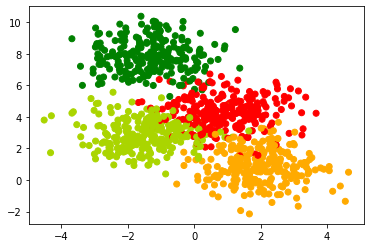

In [409]:
plt.scatter(data[:,0], data[:,1], c=labels, cmap=my_cmap)
plt.show()

In [410]:
labels_orig = labels
labels = np.mod(labels_orig, 2)

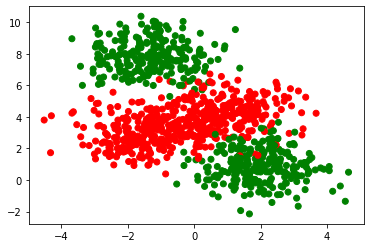

In [411]:
plt.scatter(data[:,0], data[:,1], c=labels, cmap=my_cmap)
plt.show()

In [412]:
X_train, X_val, Y_train, Y_val = train_test_split(data, labels, stratify=labels, random_state=0)
print(X_train.shape, X_val.shape)

(750, 2) (250, 2)


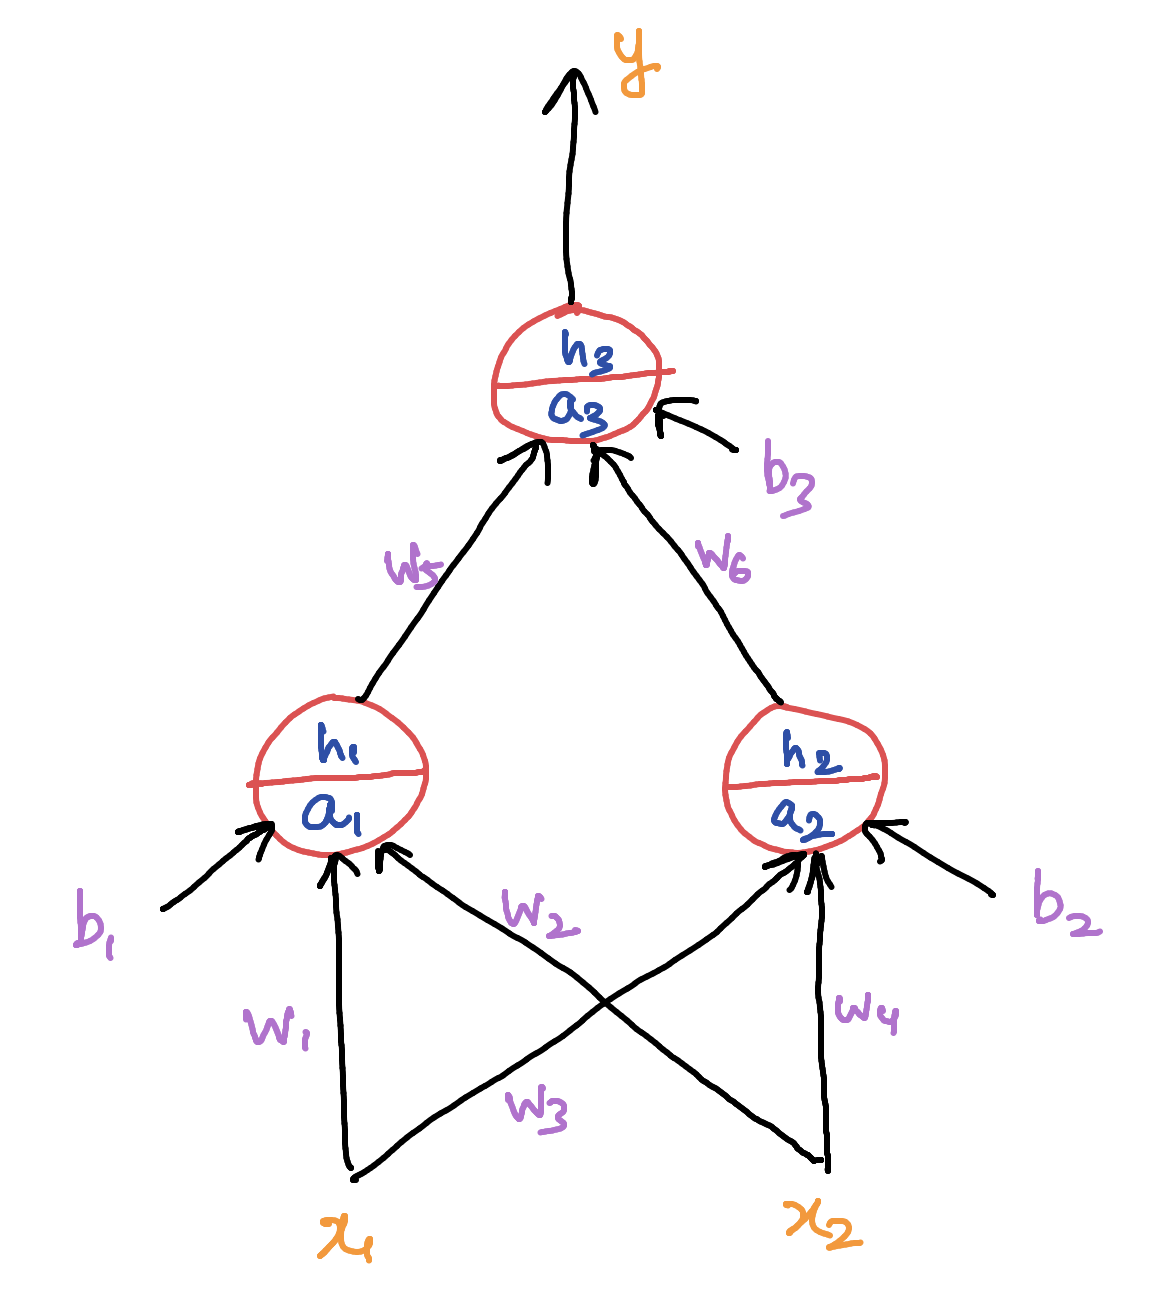

In [413]:
class FirstFFNetworkW1:
  '''
  only w1 is going to change
  '''
  
  def __init__(self):
    self.w1 = np.random.randn()
    self.w2 = np.random.randn()
    self.w3 = np.random.randn()
    self.w4 = np.random.randn()
    self.w5 = np.random.randn()
    self.w6 = np.random.randn()
    self.b1 = 0
    self.b2 = 0
    self.b3 = 0
  
  def sigmoid(self, x):
    return 1.0/(1.0 + np.exp(-x))
  
  def forward_pass(self, x):
    self.x1, self.x2 = x
    self.a1 = self.w1*self.x1 + self.w2*self.x2 + self.b1
    self.h1 = self.sigmoid(self.a1)
    self.a2 = self.w3*self.x1 + self.w4*self.x2 + self.b2
    self.h2 = self.sigmoid(self.a2)
    self.a3 = self.w5*self.h1 + self.w6*self.h2 + self.b3
    self.h3 = self.sigmoid(self.a3)
    return self.h3
  
  def grad(self, x, y):
    self.forward_pass(x)
    
    # self.dw5 = (self.h3-y) * self.h3*(1-self.h3) * self.h1
    # self.dw6 = (self.h3-y) * self.h3*(1-self.h3) * self.h2
    # self.db3 = (self.h3-y) * self.h3*(1-self.h3)
    
    self.dw1 = (self.h3-y) * self.h3*(1-self.h3) * self.w5 * self.h1*(1-self.h1) * self.x1
    # self.dw2 = (self.h3-y) * self.h3*(1-self.h3) * self.w5 * self.h1*(1-self.h1) * self.x2
    # self.db1 = (self.h3-y) * self.h3*(1-self.h3) * self.w5 * self.h1*(1-self.h1)
  
    # self.dw3 = (self.h3-y) * self.h3*(1-self.h3) * self.w6 * self.h2*(1-self.h2) * self.x1
    # self.dw4 = (self.h3-y) * self.h3*(1-self.h3) * self.w6 * self.h2*(1-self.h2) * self.x2
    # self.db2 = (self.h3-y) * self.h3*(1-self.h3) * self.w6 * self.h2*(1-self.h2)
    
  
  def fit(self, X, Y, epochs=1, learning_rate=1, initialise=True, display_loss=False):
    
    # initialise w, b
    if initialise:
      self.w1 = np.random.randn()
      self.w2 = np.random.randn()
      self.w3 = np.random.randn()
      self.w4 = np.random.randn()
      self.w5 = np.random.randn()
      self.w6 = np.random.randn()
      self.b1 = 0
      self.b2 = 0
      self.b3 = 0
      
    if display_loss:
      loss = {}
      w1_wei = {}
      h1 = {}
      h3 = {}
    
    for i in tqdm_notebook(range(epochs), total=epochs, unit="epoch"):
      dw1, dw2, dw3, dw4, dw5, dw6, db1, db2, db3 = [0]*9
      for x, y in zip(X, Y):
        self.grad(x, y)
        dw1 += self.dw1
        # dw2 += self.dw2
        # dw3 += self.dw3
        # dw4 += self.dw4
        # dw5 += self.dw5
        # dw6 += self.dw6
        # db1 += self.db1
        # db2 += self.db2
        # db3 += self.db3
        
      m = X.shape[1]
      self.w1 -= learning_rate * dw1 / m
      # self.w2 -= learning_rate * dw2 / m
      # self.w3 -= learning_rate * dw3 / m
      # self.w4 -= learning_rate * dw4 / m
      # self.w5 -= learning_rate * dw5 / m
      # self.w6 -= learning_rate * dw6 / m
      # self.b1 -= learning_rate * db1 / m
      # self.b2 -= learning_rate * db2 / m
      # self.b3 -= learning_rate * db3 / m
      
      if display_loss:
        w1_wei[i] = self.w1
        Y_pred = self.predict(X)
        loss[i] = mean_squared_error(Y_pred, Y)
        h1[i] = self.h1
        h3[i] = self.h3
    
    if display_loss:
      plt.tight_layout()

      plt.plot(np.array(list(loss.values())).astype(float))      
      plt.xlabel('Epochs')
      plt.ylabel('Mean Squared Error')
      plt.show()

      plt.plot(np.array(list(w1_wei.values())).astype(float))      
      plt.xlabel('Epochs')
      plt.ylabel('W1')
      plt.show()

      plt.plot(np.array(list(h1.values())).astype(float))      
      plt.xlabel('Epochs')
      plt.ylabel('h1')
      plt.show()

      plt.plot(np.array(list(h3.values())).astype(float))      
      plt.xlabel('Epochs')
      plt.ylabel('h3')
      plt.show()
      
  def predict(self, X):
    Y_pred = []
    for x in X:
      y_pred = self.forward_pass(x)
      Y_pred.append(y_pred)
    return np.array(Y_pred)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:66: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


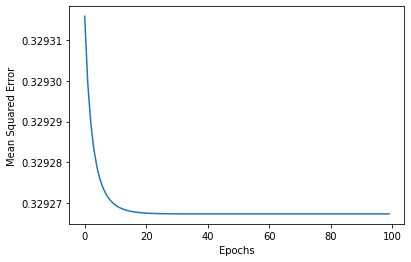

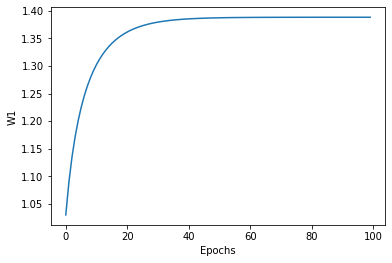

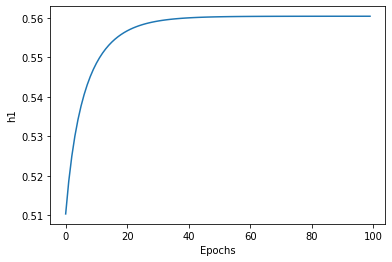

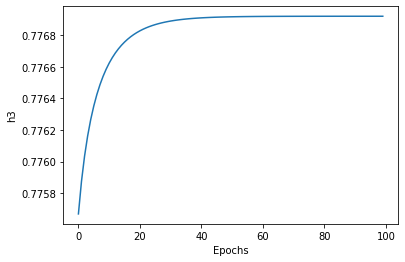

In [414]:
ffn = FirstFFNetworkW1()
ffn.fit(X_train, Y_train, epochs=100, learning_rate=1, display_loss=True)

In [415]:
Y_pred_train = ffn.predict(X_train)
Y_pred_binarised_train = (Y_pred_train >= 0.5).astype("int").ravel()
Y_pred_val = ffn.predict(X_val)
Y_pred_binarised_val = (Y_pred_val >= 0.5).astype("int").ravel()
accuracy_train = accuracy_score(Y_pred_binarised_train, Y_train)
accuracy_val = accuracy_score(Y_pred_binarised_val, Y_val)

print("Training accuracy", round(accuracy_train, 2))
print("Validation accuracy", round(accuracy_val, 2))

Training accuracy 0.5
Validation accuracy 0.5


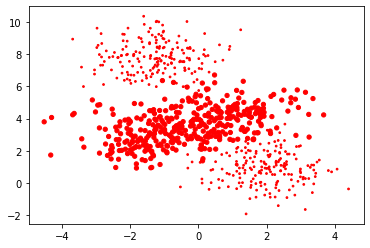

In [416]:
plt.scatter(X_train[:,0], X_train[:,1], c=Y_pred_binarised_train, cmap=my_cmap, s=15*(np.abs(Y_pred_binarised_train-Y_train)+.2))
plt.show()

# For Full Network


In [417]:
my_cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["red","yellow","green"])

In [418]:
np.random.seed(0)

## Generate data

In [419]:
data, labels = make_blobs(n_samples=1000, centers=4, n_features=2, random_state=0)
print(data.shape, labels.shape)

(1000, 2) (1000,)


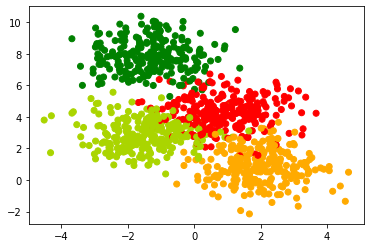

In [420]:
plt.scatter(data[:,0], data[:,1], c=labels, cmap=my_cmap)
plt.show()

In [421]:
labels_orig = labels
labels = np.mod(labels_orig, 2)

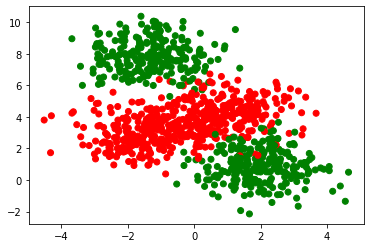

In [422]:
plt.scatter(data[:,0], data[:,1], c=labels, cmap=my_cmap)
plt.show()

In [423]:
X_train, X_val, Y_train, Y_val = train_test_split(data, labels, stratify=labels, random_state=0)
print(X_train.shape, X_val.shape)

(750, 2) (250, 2)


# FF Network

In [424]:
class FirstFFNetwork:
  
  def __init__(self):
    self.w1 = np.random.randn()
    self.w2 = np.random.randn()
    self.w3 = np.random.randn()
    self.w4 = np.random.randn()
    self.w5 = np.random.randn()
    self.w6 = np.random.randn()
    self.b1 = 0
    self.b2 = 0
    self.b3 = 0
  
  def sigmoid(self, x):
    return 1.0/(1.0 + np.exp(-x))
  
  def forward_pass(self, x):
    self.x1, self.x2 = x
    self.a1 = self.w1*self.x1 + self.w2*self.x2 + self.b1
    self.h1 = self.sigmoid(self.a1)
    self.a2 = self.w3*self.x1 + self.w4*self.x2 + self.b2
    self.h2 = self.sigmoid(self.a2)
    self.a3 = self.w5*self.h1 + self.w6*self.h2 + self.b3
    self.h3 = self.sigmoid(self.a3)
    return self.h3
  
  def grad(self, x, y):
    self.forward_pass(x)
    
    self.dw5 = (self.h3-y) * self.h3*(1-self.h3) * self.h1
    self.dw6 = (self.h3-y) * self.h3*(1-self.h3) * self.h2
    self.db3 = (self.h3-y) * self.h3*(1-self.h3)
    
    self.dw1 = (self.h3-y) * self.h3*(1-self.h3) * self.w5 * self.h1*(1-self.h1) * self.x1
    self.dw2 = (self.h3-y) * self.h3*(1-self.h3) * self.w5 * self.h1*(1-self.h1) * self.x2
    self.db1 = (self.h3-y) * self.h3*(1-self.h3) * self.w5 * self.h1*(1-self.h1)
  
    self.dw3 = (self.h3-y) * self.h3*(1-self.h3) * self.w6 * self.h2*(1-self.h2) * self.x1
    self.dw4 = (self.h3-y) * self.h3*(1-self.h3) * self.w6 * self.h2*(1-self.h2) * self.x2
    self.db2 = (self.h3-y) * self.h3*(1-self.h3) * self.w6 * self.h2*(1-self.h2)
    
  
  def fit(self, X, Y,epochs=1, learning_rate=1, initialise=True, display_loss=False,display_weights = True):
    
    # initialise w, b
    if initialise:
      self.w1 = np.random.randn()
      self.w2 = np.random.randn()
      self.w3 = np.random.randn()
      self.w4 = np.random.randn()
      self.w5 = np.random.randn()
      self.w6 = np.random.randn()
      self.b1 = 0
      self.b2 = 0
      self.b3 = 0
      
    if display_loss:
      loss = {}
      w1 = {}
    
    for i in tqdm_notebook(range(epochs), total=epochs, unit="epoch"):
      dw1, dw2, dw3, dw4, dw5, dw6, db1, db2, db3 = [0]*9
      for x, y in zip(X, Y):
        self.grad(x, y)
        dw1 += self.dw1
        dw2 += self.dw2
        dw3 += self.dw3
        dw4 += self.dw4
        dw5 += self.dw5
        dw6 += self.dw6
        db1 += self.db1
        db2 += self.db2
        db3 += self.db3
        
      m = X.shape[1]
      self.w1 -= learning_rate * dw1 / m
      self.w2 -= learning_rate * dw2 / m
      self.w3 -= learning_rate * dw3 / m
      self.w4 -= learning_rate * dw4 / m
      self.w5 -= learning_rate * dw5 / m
      self.w6 -= learning_rate * dw6 / m
      self.b1 -= learning_rate * db1 / m
      self.b2 -= learning_rate * db2 / m
      self.b3 -= learning_rate * db3 / m
      
      if display_loss:
        Y_pred = self.predict(X)
        loss[i] = mean_squared_error(Y_pred, Y)

      if display_weights:
        weight_matrix = np.array([[0,self.b3,self.w5,self.w6,0,0],[self.b1,self.w1,self.w2,self.w3,self.w4,self.b2]])
        weight_matrices.append(weight_matrix)
            
    if display_loss:
      plt.plot(np.array(list(loss.values())).astype(float))      
      plt.xlabel('Epochs')
      plt.ylabel('Mean Squared Error')
      plt.show()
      
  def predict(self, X):
    Y_pred = []
    for x in X:
      y_pred = self.forward_pass(x)
      Y_pred.append(y_pred)
    return np.array(Y_pred)

  def predict_h1(self, X):
    Y_pred = []
    for x in X:
      y_pred = self.forward_pass(x)
      Y_pred.append(self.h1)
    return np.array(Y_pred)
  
  def predict_h2(self, X):
    Y_pred = []
    for x in X:
      y_pred = self.forward_pass(x)
      Y_pred.append(self.h2)
    return np.array(Y_pred)
  
  def predict_h3(self, X):
    Y_pred = []
    for x in X:
      y_pred = self.forward_pass(x)
      Y_pred.append(self.h3)
    return np.array(Y_pred)
  

## FFNetwork Classification

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:61: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


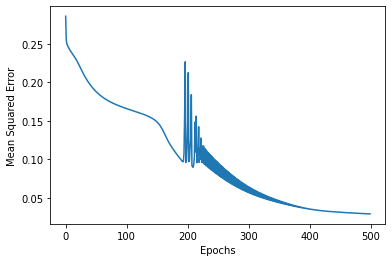

In [425]:
weight_matrices = []
ffn = FirstFFNetwork()
ffn.fit(X_train, Y_train, epochs=500, learning_rate=.01, display_loss=True)

In [426]:
Y_pred_train = ffn.predict(X_train)
Y_pred_binarised_train = (Y_pred_train >= 0.5).astype("int").ravel()
Y_pred_val = ffn.predict(X_val)
Y_pred_binarised_val = (Y_pred_val >= 0.5).astype("int").ravel()
accuracy_train = accuracy_score(Y_pred_binarised_train, Y_train)
accuracy_val = accuracy_score(Y_pred_binarised_val, Y_val)

print("Training accuracy", round(accuracy_train, 2))
print("Validation accuracy", round(accuracy_val, 2))

Training accuracy 0.97
Validation accuracy 0.94


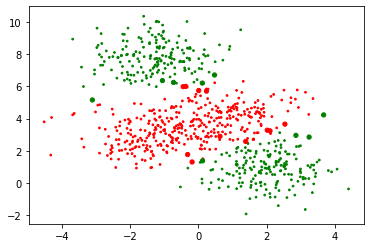

In [427]:
plt.scatter(X_train[:,0], X_train[:,1], c=Y_pred_binarised_train, cmap=my_cmap, s=15*(np.abs(Y_pred_binarised_train-Y_train)+.2))
plt.show()

# Plots - to visulize and interpreat role of each weights

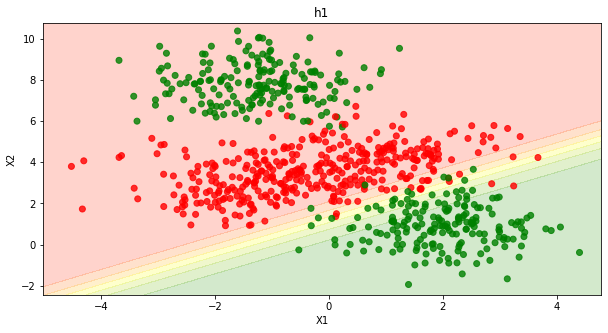

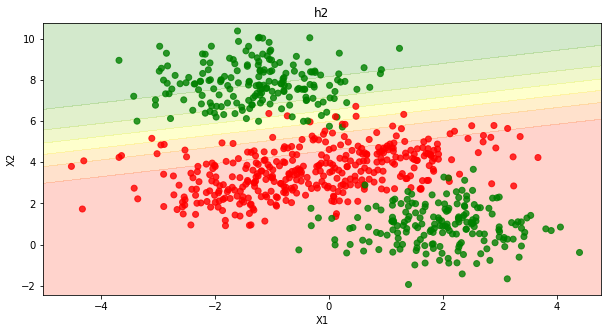

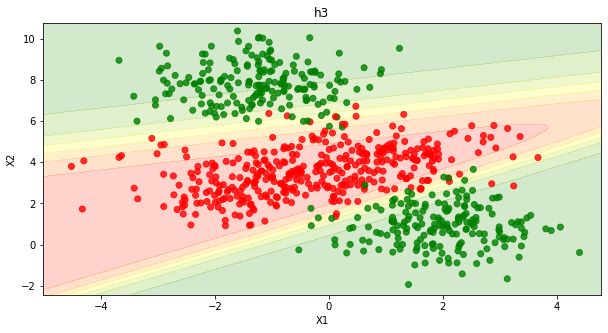

True

In [428]:
def make_meshgrid(x,y,h=0.2):
  x_min, x_max = x.min() - 0.5, x.max()+0.5
  y_min, y_max = y.min() - 0.5, y.max()+0.5
  xx, yy = np.meshgrid(np.arange(x_min,x_max,h),
                       np.arange(y_min,y_max,h))
  return xx,yy

def plot_contours(ax,predict,xx,yy,**params):
  Z = predict(np.c_[xx.ravel(),yy.ravel()])
  Z = Z.reshape(xx.shape)
  out = ax.contourf(xx,yy,Z,**params)
  return out

def plot_boundary():
  xx, yy = make_meshgrid(X_train[:,0],X_train[:,1])
  predict_function = [ffn.predict_h1,ffn.predict_h2,ffn.predict_h3]

  for i in range(3):
    fig , ax = plt.subplots(figsize=(10,5))
    plot_contours(ax, predict_function[i],xx,yy,cmap=my_cmap, alpha=0.2)
    ax.scatter(X_train[:,0],X_train[:,1],c=Y_train,cmap=my_cmap,alpha=0.8)
    ax.set_xlim(xx.min(),xx.max())
    ax.set_ylim(yy.min(),yy.max())
    ax.set_xlabel('X1')
    ax.set_ylabel('X2')
    ax.set_title('h'+str(i+1))
    plt.show()

  return True

plot_boundary()



Observation:

- By comparing plots it is clear that h1, h2 individually seperates the boundary(thin comapred to plot-3).
- Where as , h3 combines both and also change is function value become smaller.


# Visulizing the weights



In [429]:
import seaborn as sns
def plot_heat_map(epoch):
  fig = plt.figure()
  sns.heatmap(weight_matrices[epoch],annot=True,cmap=my_cmap,vmin=-3,vmax=3)
  plt.title('Epoch'+str(epoch))
  fig.canvas.draw()
  image = np.frombuffer(fig.canvas.tostring_rgb(),dtype='uint8')
  image = image.reshape(fig.canvas.get_width_height()[::-1]+(3,))
  return image




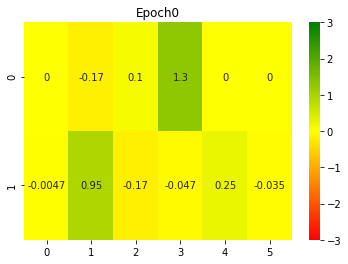

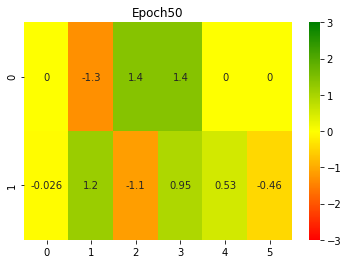

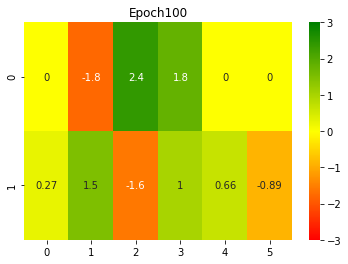

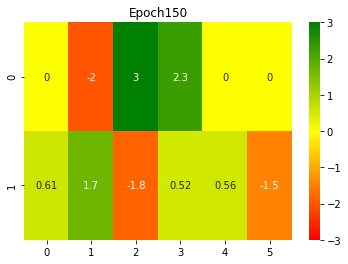

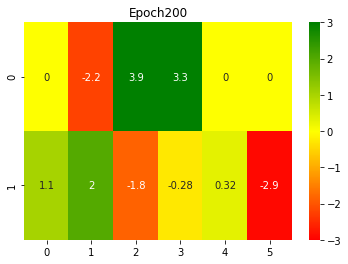

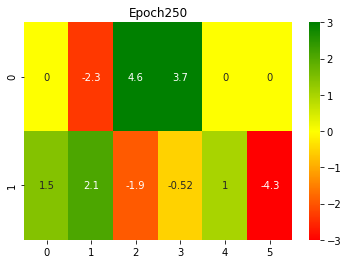

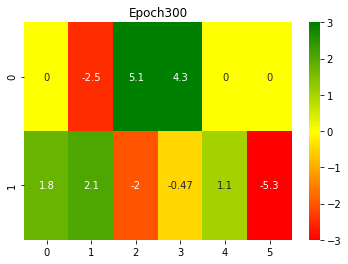

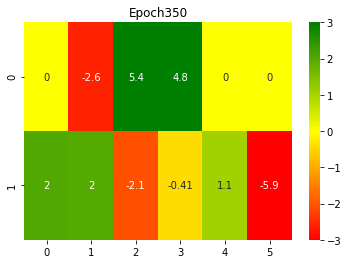

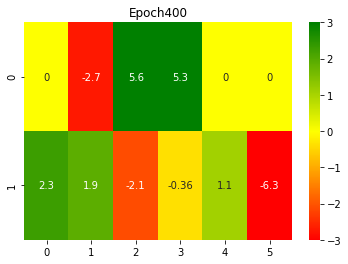

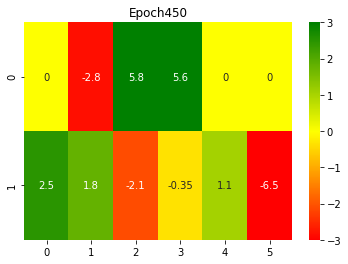

In [430]:
import imageio
imageio.mimsave('./weights_viz.gif',[plot_heat_map(i) for i in range(0,len(weight_matrices),len(weight_matrices)//10)],fps=1)

In [436]:
from IPython import display
HTML('<img src="weights_viz.gif">')

In [436]:
Y_pred_train = ffn.predict(X_train)
Y_pred_binarised_train = (Y_pred_train >= 0.5).astype("int").ravel()
Y_pred_val = ffn.predict(X_val)
Y_pred_binarised_val = (Y_pred_train >= 0.5).astype("int").ravel()
accuracy_train = accuracy_score(Y_pred_binarised_train,Y_train) 
print(accuracy_train)


0.9733333333333334
